In [1]:
using Oceananigans, CairoMakie
using ColorSchemes

In [2]:
u_timeseries = FieldTimeSeries("2gpu_mpi_rank0.jld2", "u")
v_timeseries = FieldTimeSeries("2gpu_mpi_rank0.jld2", "v")
w_timeseries = FieldTimeSeries("2gpu_mpi_rank0.jld2", "w")

times = Array(u_timeseries.times)

3-element Vector{Float64}:
 0.0
 0.4999999999999981
 0.9999999999999962

In [3]:
u_timeseries[end]

512×1024×512 Field{Face, Center, Center} on RectilinearGrid on CPU
├── grid: 512×1024×512 RectilinearGrid{Float64, Oceananigans.Grids.FullyConnected, Periodic, Periodic} on CPU with 3×3×3 halo
├── boundary conditions: FieldBoundaryConditions
│   └── west: DistributedCommunication, east: DistributedCommunication, south: Periodic, north: Periodic, bottom: Periodic, top: Periodic, immersed: ZeroFlux
└── data: 518×1030×518 OffsetArray(view(::Array{Float64, 4}, :, :, :, 3), -2:515, -2:1027, -2:515) with eltype Float64 with indices -2:515×-2:1027×-2:515
    └── max=0.596624, min=-0.611826, mean=-2.20792e-6

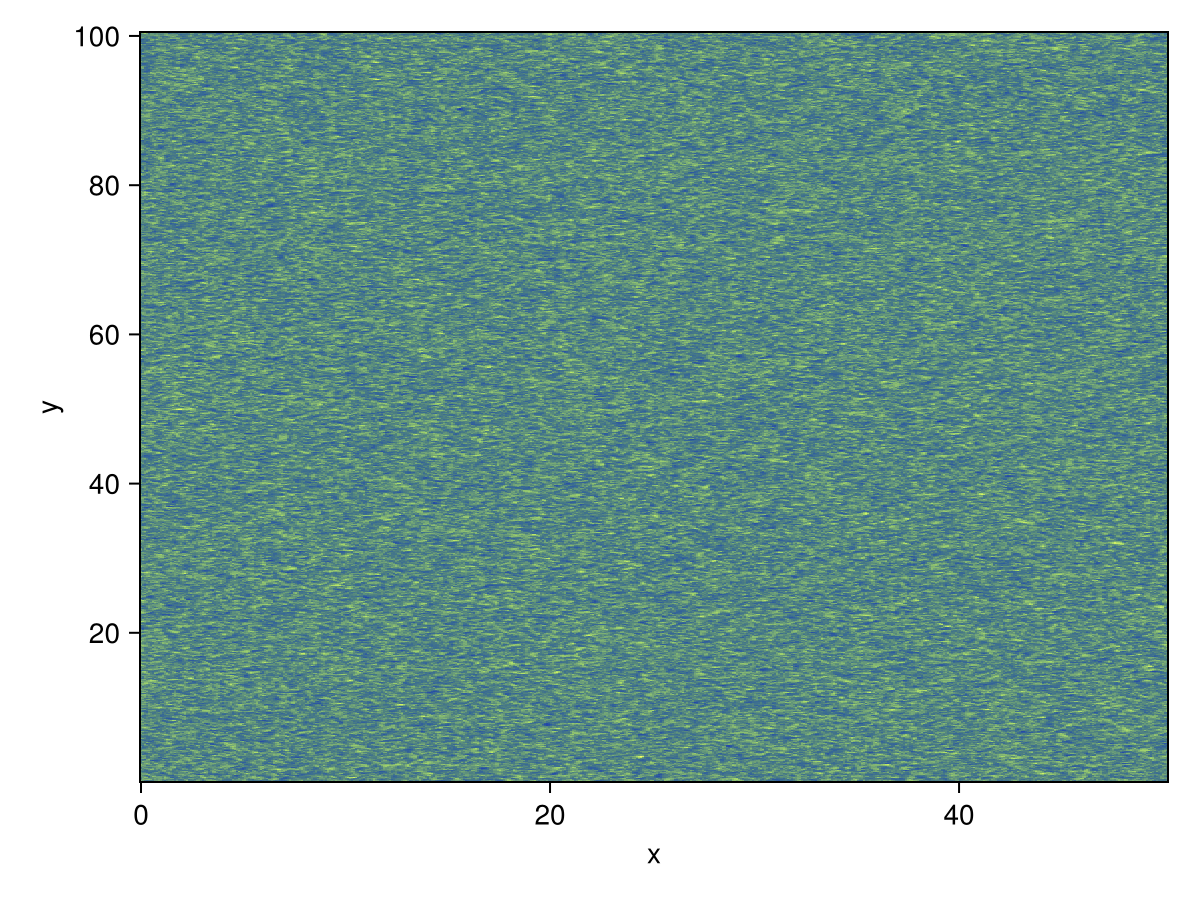

In [4]:
u_slice = Field(u_timeseries[end], indices = (:, :, 10))

heatmap(u_slice, colormap = ColorSchemes.imola.colors)

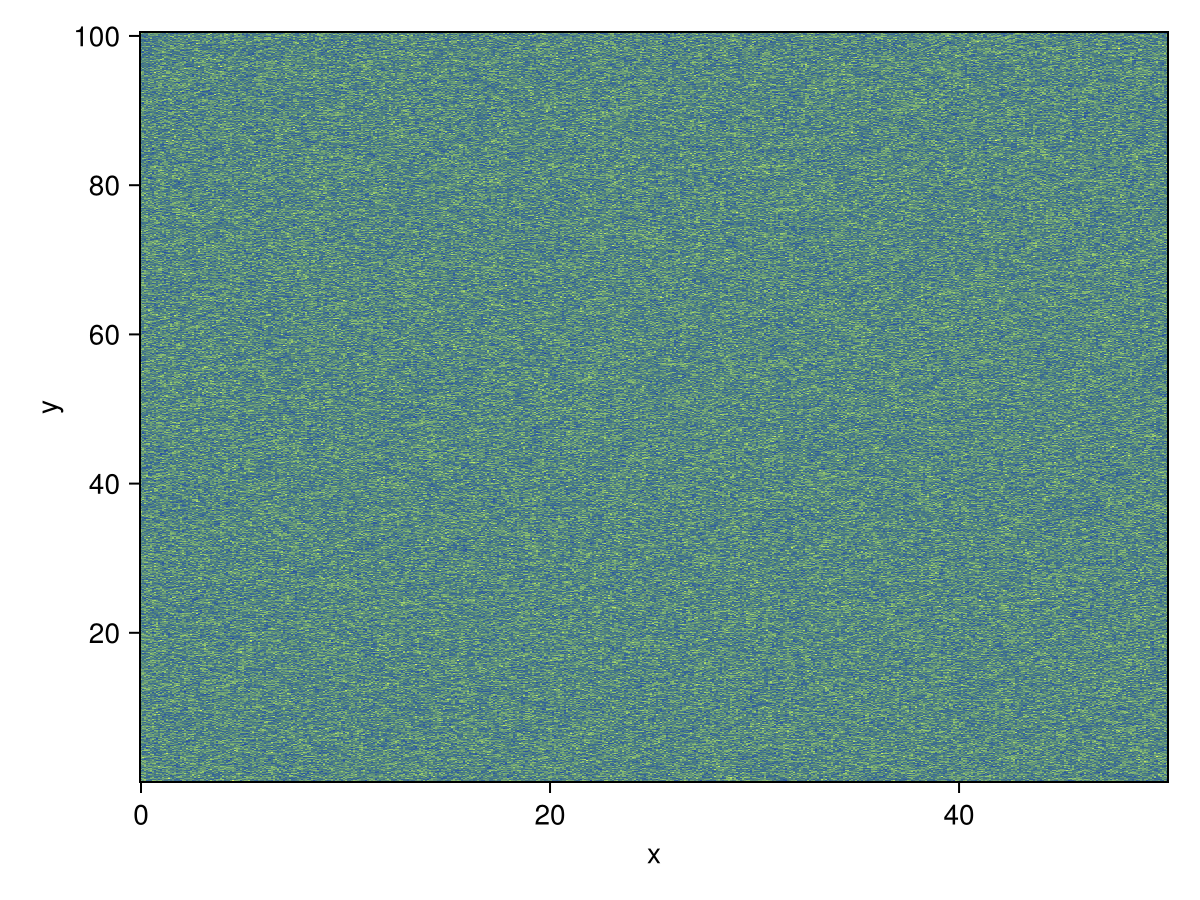

In [5]:
u_slice = Field(u_timeseries[1], indices = (:, :, 10))

heatmap(u_slice, colormap = ColorSchemes.imola.colors)

In [ ]:
using Statistics

ke_init = mean(u_timeseries[1] .^ 2 + v_timeseries[1] .^ 2 + w_timeseries[1] .^ 2)

0.6666723678348725

In [ ]:
ke_fin = mean(u_timeseries[end] .^ 2 + v_timeseries[end] .^ 2 + w_timeseries[end] .^ 2)

0.040062716928434675